## Load data from CSVs

In [ ]:
import unicodecsv

In [15]:
enrollments = []

#longer version of code (replaced with shorter, equivalent version below)
with open('enrollments.csv','rb') as f:   #with statements-->file will be automatically closed without f.close() needed
    reader = unicodecsv.DictReader(f)    #you can only loop over an iterator once
    for row in reader:
        enrollments.append(row)
    #enrollments = list(reader)

In [32]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [ ]:
def read_csv(filename):
    with open(filename,'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [29]:
#read in the data from daily_engagement.csv and project_submissions.csv 
#and store the results in the below variables
#then look at the first row of each table
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [30]:
print(daily_engagement[0])
print(project_submissions[0])

OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


## Fixing data types

In [33]:
from datetime import datetime as dt

#takes a date as a string, and returns a Python datetime object
#if there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')  

#takes a string which is either an empty string or represents an integer,
#and returns an int or None
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

#clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [35]:
#clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [34]:
#clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Investigating the data

In [ ]:
#rename the "acct" column in the daily_engagement table to "account_key"
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [49]:
#find the total number of rows and the number of unique students (account keys) 
#in each table
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [50]:
len(enrollments)

1640

In [56]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [57]:
len(daily_engagement)

136240

In [58]:
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [59]:
len(project_submissions)

3642

In [60]:
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

## Missing engagement records

In [61]:
#find any one student enrollments where the student is missing from the daily engagement table
#output that enrollment
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)   #join date and cancel date are the same, days to cancel = 0
        break               #The student probably needs to be enrolled for a full day before their engagement is recorded

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## Checking for more problem records 

In [63]:
#find the number of surprising data points (enrollments missing from
#the engagement table) that remain, if any
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']:
        print(enrollment)
        num_problem_students += 1

num_problem_students   #these students were all Udacity test accounts,
                       #which aren't guaranteed to be present in the daily engagement table

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


3

## Tracking down the remaining problems

In [65]:
#create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)                                    

6

In [67]:
#given some data with an account_key field, 
#removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data           

In [68]:
#remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the question 

In [70]:
#create a dictionary named paid_students containing all students who either
#haven't canceled yet or who remained enrolled for more than 7 days
#the keys should be account keys, and the values should be the date the student enrolled
paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date

len(paid_students)

995

## Getting data from first week

In [123]:
#takes a student's join date and the date of a specific engagement record,
#and returns True if that engagement record happened within one week of the student joining
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [124]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [125]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [155]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [156]:
#create a list of rows from the engagement table including only rows where
#the student is one of the paid students you just found
#and the date is within one week of the student's join date
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

## Exploring student engagement

In [157]:
from collections import defaultdict

In [158]:
#create a dictionary of engagement grouped by student
#the keys are account keys, and the values are lists of engagement records
engagement_by_account = defaultdict(list)   #specify a default value 'list'-->if the key is not there, will get the empty list instead
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [159]:
#create a dictionary with the total minutes each student spent in the classroom during the first week
#the keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key,engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [160]:
import numpy as np

#summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
print('Mean:',np.mean(total_minutes))
print('Standard deviation:',np.std(total_minutes))
print('Minimum:',np.min(total_minutes))
print('Maximum:',np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging data analysis code 

In [161]:
#go through a similar process as before to see if there is a problem.
#locate at least one surprising piece of data, output it, and take a look at it-->within_one_week() function
student_with_max_minutes = None
max_minutes = 0

for student,total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

3564.7332644989997

In [162]:
for engagement_record in paid_engagement:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_c

## Lessons completed in first week

In [163]:
from collections import defaultdict

In [164]:
#adapt the code above to find the mean, standard deviation, minimum, and maximum for
#the number of lessons completed by each student during the first week
#Try creating one or more functions to re-use the code above
def group_data(data,key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

In [165]:
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [166]:
def sum_grouped_items(grouped_data,field_name):
    summed_data = {}
    for key,data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

In [167]:
total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')

In [168]:
import numpy as np

def describe_data(data):
    print('Mean:',np.mean(data))
    print('Standard deviation:',np.std(data))
    print('Minimum:',np.min(data))
    print('Maximum:',np.max(data))

total_minutes = list(total_minutes_by_account.values())
describe_data(total_minutes)

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [169]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')
describe_data(list(lessons_completed_by_account.values()))

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of visits in first week

In [173]:
#after revising the paid_engagement by adding a key "has_visited"
#find the mean, standard deviation, minimum, and maximum for the number of
#days each student visits the classroom during the first week
days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')
describe_data(list(days_visited_by_account.values()))

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out passing students

In [174]:
subway_project_lesson_keys = ['746169184','3176718735']

#create two lists of engagement data for paid students in the first week
#the first list should contain data for students who eventually pass the subway project
#and the second list should contain data for students who do not
pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
        
len(pass_subway_project)        

647

In [178]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the two student groups

In [179]:
#compute some metrics you're interested in and see how they differ for
#students who pass the subway project vs. students who don't
#A good starting point would be the metrics we looked at earlier
#(minutes spent in the classroom, lessons completed, and days visited)
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

In [183]:
print('Non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(list(non_passing_minutes.values()))
print()
print('Passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
describe_data(list(passing_minutes.values()))

Non-passing students:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999

Passing students:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


In [184]:
print('Non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(list(non_passing_minutes.values()))
print()
print('Passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data(list(passing_minutes.values()))

Non-passing students:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27

Passing students:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


In [185]:
print('Non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,'has_visited')
describe_data(list(non_passing_minutes.values()))
print()
print('Passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')
describe_data(list(passing_minutes.values()))

Non-passing students:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7

Passing students:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


## Making histograms

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt

In [212]:
#make histograms of the three metrics we looked at earlier for both
#students who passed the subway project and students who didn't
#you might also want to make histograms of any other metrics you examined
def describe_data(data):
    print('Mean:',np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:',np.min(data))
    print('Maximum:',np.max(data))
    plt.hist(data)

Non-passing students: total_minutes_visited
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


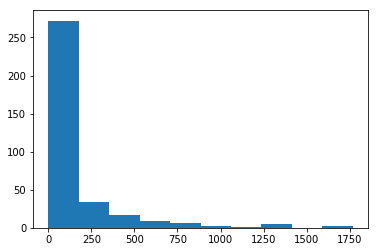

In [213]:
print('Non-passing students: total_minutes_visited')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(list(non_passing_minutes.values()))

Passing students: total_minutes_visited
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


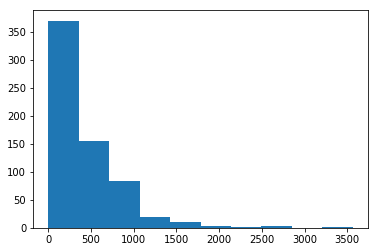

In [214]:
print('Passing students: total_minutes_visited')
passing_minutes = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
describe_data(list(passing_minutes.values()))

Non-passing students: lessons_completed
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


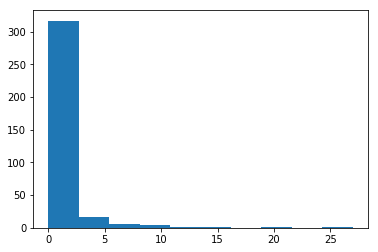

In [215]:
print('Non-passing students: lessons_completed')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(list(non_passing_minutes.values()))

Passing students: lessons_completed
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


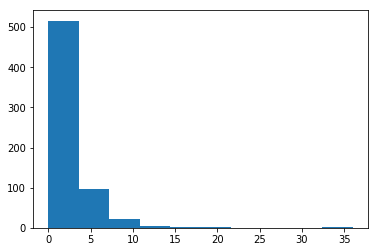

In [216]:
print('Passing students: lessons_completed')
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data(list(passing_minutes.values()))

Non-passing students: has_visited
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


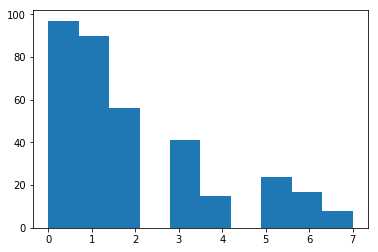

In [217]:
print('Non-passing students: has_visited')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,'has_visited')
describe_data(list(non_passing_minutes.values()))

Passing students: has_visited
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


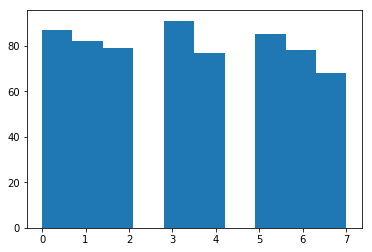

In [218]:
print('Passing students: has_visited')
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')
describe_data(list(passing_minutes.values()))

## Improving plots and sharing findings

In [250]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /anaconda3/lib/python3.7/site-packages (0.9.0)
You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Text(0.5, 1.0, 'Distribution of classroom visits in the first week for students who pass the subway project')

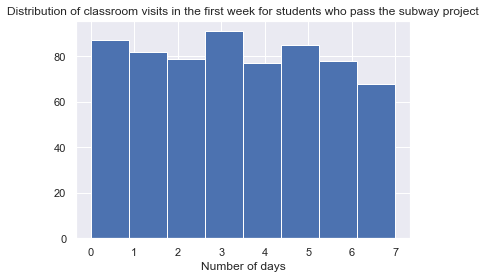

In [264]:
import seaborn as sns

#make a more polished version of at least one of your visualizations from earlier
#try importing the seaborn library to make the visualization look better, 
#adding axis labels and a title, and changing one or more arguments to the hist() function
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')

plt.hist(list(passing_visits.values()),bins = 8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week for students who pass the subway project')

Text(0.5, 1.0, 'Distribution of classroom visits in the first week for students who do not pass the subway project')

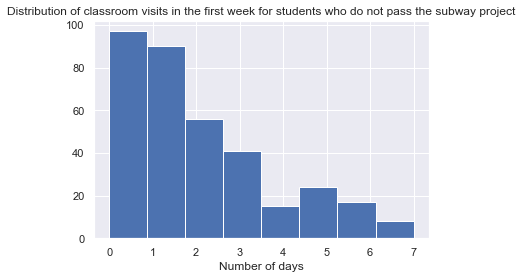

In [265]:
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,'has_visited')

plt.hist(list(non_passing_visits.values()),bins = 8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week for students who do not pass the subway project')